# Case Study_Human Resourse Dataset

* <b>Human_Resources.csv<b/> Analysis
* Apply K mean Clustering
* Apply PCA
* Apply Autoencoder

## Task 1:Import your libraries (Lab 2)

In [107]:
#Import the libraries here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [5]:
#Attach the Human_Resource.csv file and view the first five records
df = pd.read_csv('Human_Resources.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# show all the file data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
# Show the following basic statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Task 2: Visualize Dataset (Lab 2)

In [17]:
# Replace 'Attritition','Overtime' and 'Over18' columns with integers before performing any visualizations
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Over18'] = df['Over18'].map({'Y': 1})

In [19]:
# display the current first four records
df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


In [21]:
# Drop EmployeeNumber',EmployeeCount' ,'Standardhours' and 'Over18' since they do not change from one employee to the other
df.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [25]:
# Let's see how many employees left the company!
left_df        = df[df['Attrition'] == 1]
stayed_df      = df[df['Attrition'] == 0]

In [27]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset
total = len(df)

num_left = len(left_df)
pct_left = (num_left / total) * 100

num_stayed = len(stayed_df)
pct_stayed = (num_stayed / total) * 100

print(f"Total = {total}")
print(f"Number of employees who left the company = {num_left}")
print(f"Percentage of employees who left the company = {pct_left} %")
print(f"Number of employees who did not leave the company (stayed) = {num_stayed}")
print(f"Percentage of employees who did not leave the company (stayed) = {pct_stayed} %")

Total = 1470
Number of employees who left the company = 237
Percentage of employees who left the company = 16.122448979591837 %
Number of employees who did not leave the company (stayed) = 1233
Percentage of employees who did not leave the company (stayed) = 83.87755102040816 %


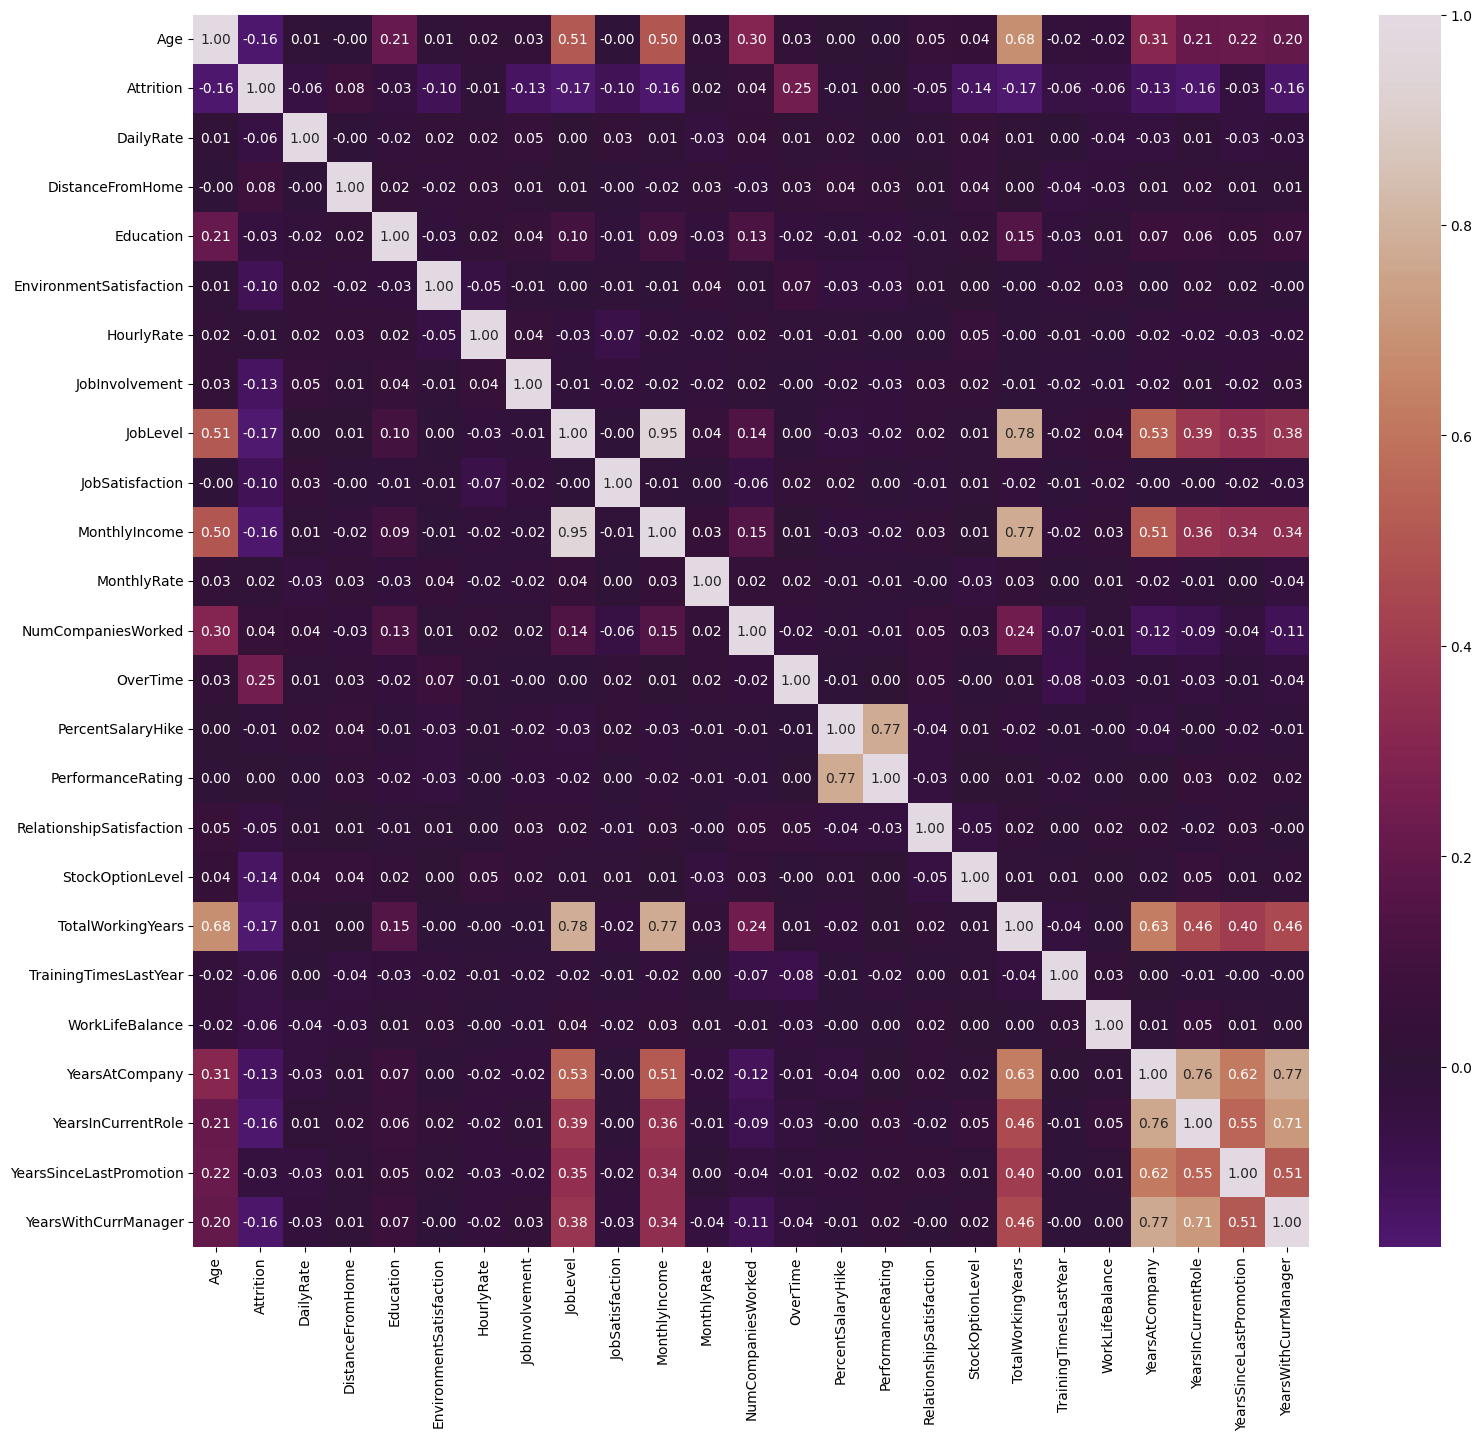

In [57]:
# show the correlation heat map as below
plt.figure(figsize=(18, 16))

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='twilight', center=0)
plt.show()



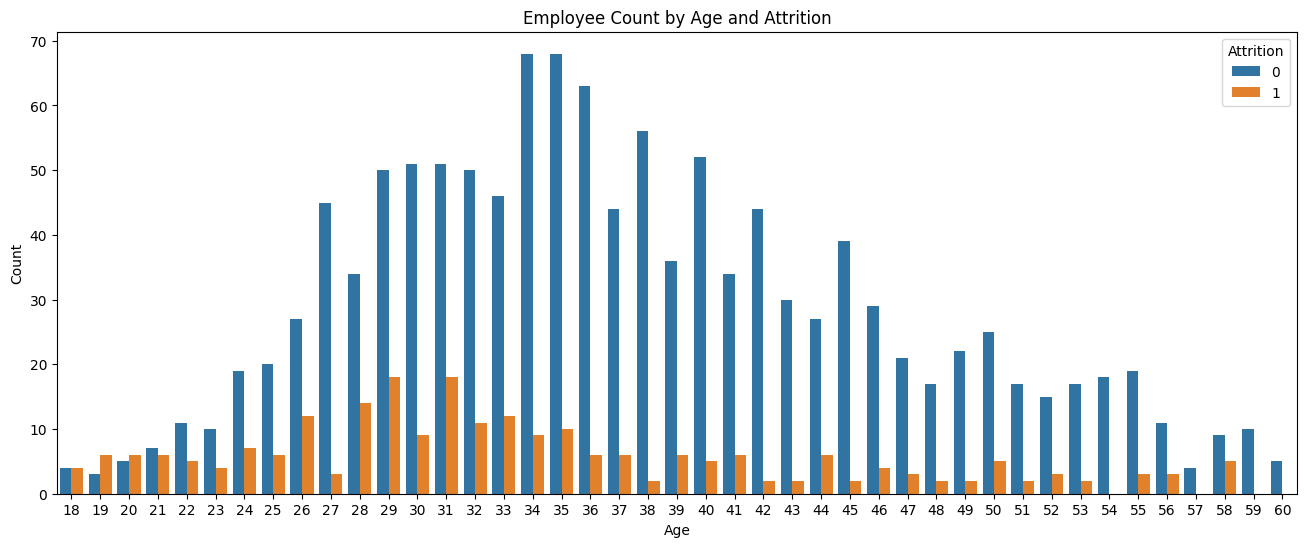

In [59]:
# Display the below visualization with hue as Attrition
plt.figure(figsize=(16, 6))

sns.countplot(data=df, x='Age', hue='Attrition')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Employee Count by Age and Attrition')
plt.show()

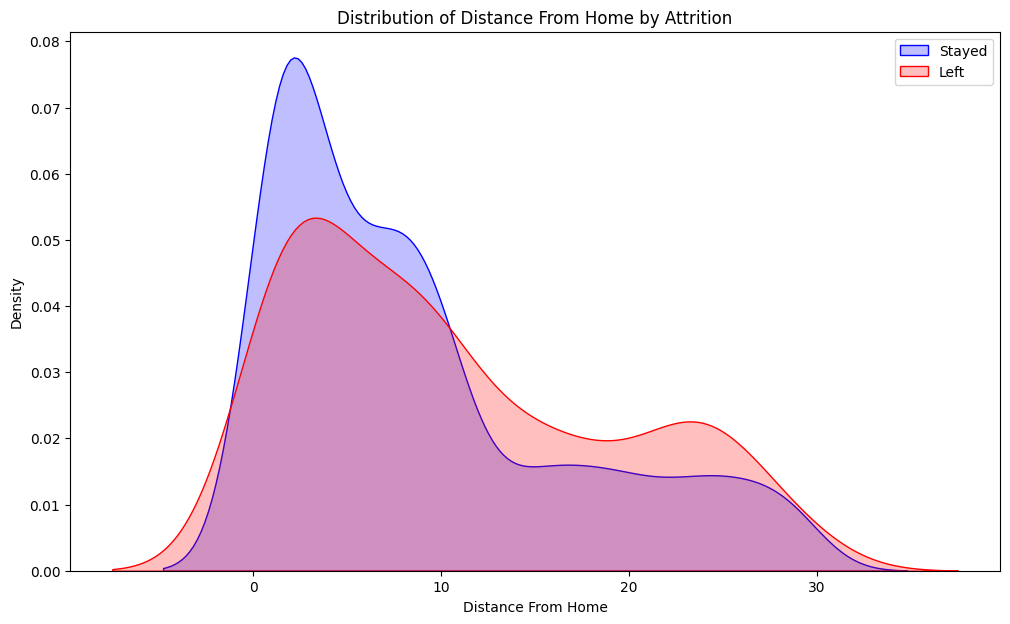

In [65]:
# create a Kernel Density Estimate comparing 'Employees who left' and 'Employees who Stayed' using 'Distance From Home'
plt.figure(figsize=(12,7))
sns.kdeplot(df[df['Attrition'] == 0]['DistanceFromHome'], color='blue', fill=True, label='Stayed')

sns.kdeplot(df[df['Attrition'] == 1]['DistanceFromHome'], color='red', fill=True, label='Left')

plt.title('Distribution of Distance From Home by Attrition')
plt.xlabel('Distance From Home')
plt.ylabel('Density')
plt.legend()
plt.show()

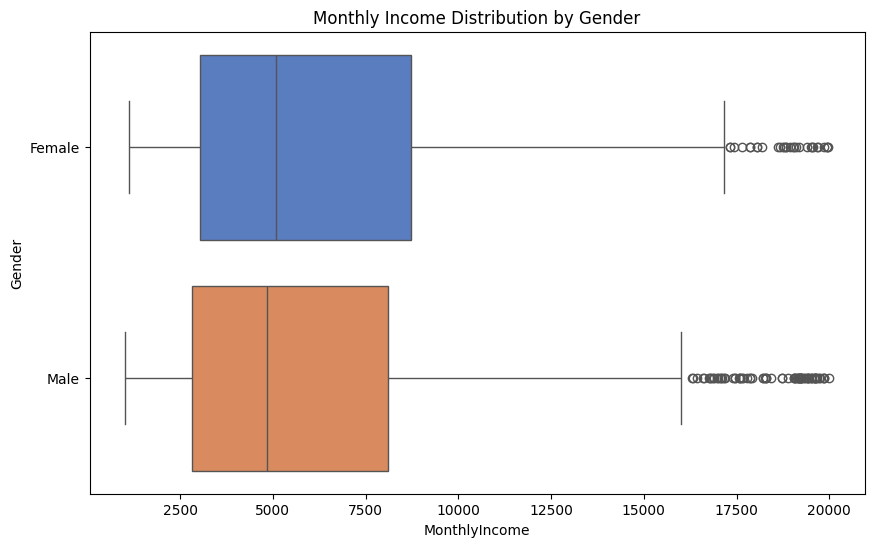

In [81]:
# Let's see the Gender vs. Monthly Income using box plots
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='MonthlyIncome', y='Gender', hue='Gender', palette='muted', dodge=False)
plt.title('Monthly Income Distribution by Gender')
plt.xlabel('MonthlyIncome')
plt.ylabel('Gender')
plt.show()

## Task 3: Create Testing and Training Dataset & Perform Data Cleaning (Lab 2)

In [93]:
# Convert the categorical fields into numerics using OneHotEncoder
categorical_cols = df.select_dtypes(include='object').columns.tolist()

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_array = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

df_encoded = pd.concat([df.drop(columns=categorical_cols).reset_index(drop=True), encoded_df], axis=1)

In [105]:
# select your features here i.e. drop the target 'Atrittion'
X = df_encoded.drop(columns=['Attrition'])

X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27,591,2,1,1,40,3,1,2,3468,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,613,6,1,4,42,2,3,1,9991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,155,4,3,2,87,4,2,2,6142,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [117]:
# scale your features data assigning it variable X
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [119]:
X

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.24462499,
        -0.91892141,  1.45864991],
       [ 1.32236521, -1.2977746 , -0.14714972, ..., -0.24462499,
         1.08823234, -0.68556546],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.24462499,
        -0.91892141,  1.45864991],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ..., -0.24462499,
         1.08823234, -0.68556546],
       [ 1.32236521,  0.54667746, -0.88751511, ..., -0.24462499,
         1.08823234, -0.68556546],
       [-0.32016256, -0.43256792, -0.14714972, ..., -0.24462499,
         1.08823234, -0.68556546]])

In [121]:
# select your dependent, target or response data as "Attrition" using variable y
y = df_encoded['Attrition']

In [123]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Task 4: Find the Optimal Number of Clusters using Elblow Method (Lab 2)

In [ ]:
# Compute 'within cluster sum of squares' or WCSS metric for a range of k clusters

In [ ]:
# Create a visualization for Finding the right number of clusters - Elbow method'

## Task 5: Apply K-Means Clustering (Lab 2)

In [ ]:
# Check size of each cluster - Are they all representative ?

## Task 6: Apply PCA and Visualize Results (Lab 3)


In [ ]:
# Obtain the principal components


In [ ]:
# All samples projected on the two principal components


In [ ]:
# Create a dataframe with the two components


In [ ]:
# Concatenate the clusters labels to the dataframe


In [ ]:
# Create a scatterplot visual of Projection of the dataset on the 2 PCA dimensions'


In [ ]:
# show the % of the total variance explained by each principal component. Overall close to 48% explained by these two.


## Task 7: Perform Dimensionality Reduction using Autoencoders (Lab 3)

In [ ]:
#import the autoencoder libraries


In [ ]:
# create your autoencoder with all the features showing Encoder, bottleneck, decoder, autoencoder
# compile the autoencoder using optimizer='adam', loss='mean_squared_error'


In [ ]:
# show the autoencoder summary


In [ ]:
## Train autoencoder using input = output


In [ ]:
# Use Autoencoder to reduce the number of features / dimensions and show the dimensions


## Task 8: Apply KMEANS to encoded dataset (Lab 3)

In [ ]:
# Apply KMEANS to encoded dataset here


In [ ]:
# create a line plot to show the " Pick optimal number of clusters using Elbow method" of the unreduced and reduced dimension Kmeans features


In [ ]:
## Apply the resulting optimal k to find new centroids



In [ ]:
## Show the centroids shape


In [ ]:
# show the clusters shape


In [ ]:
# concatenate the clusters to the data


In [ ]:
# show the 'Number of samples" in your current consolidated


In [ ]:
## Apply PCA to encoded dataset


In [ ]:
# concatenate the clusters to the data


In [ ]:
## Apply PCA to encoded dataset

In [ ]:
## Plot your pca scatterplot with clusters as the hue
